# Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [5]:
data_path = "../../data/"

# Data

In [8]:
df_radiomics = pd.read_excel(data_path + "quantitative_radiomic_features.xls")
df_radiomics['Lesion Name'] = df_radiomics['Lesion Name'].str.replace(r'-1\.les|-S2-1\.les', '', regex=True)

In [9]:
df_multigenic = pd.read_excel(data_path + "multigenic_assays.xlsx") 

/home/jose/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [10]:
df_clinical = pd.read_excel(data_path + "clinical_data.xls")

# Target Class

In [15]:
import re
import os

valid_rows = []
not_valid_count = 0 

for index, row in df_multigenic.iterrows():
    clid = row['CLID']
    
    in_radiomics = clid in df_radiomics['Lesion Name'].values
    in_clinical = clid in df_clinical['bcr_patient_barcode'].values
    
    pattern = rf"^{clid}(-1\.les|-S2-1\.les)$"
    in_folder = any(re.match(pattern, filename) for filename in os.listdir(data_path + 'TCGA_Segmented_Lesions_UofC'))
    
    # if not in_radiomics:
    #     print(f"{clid} no está en la columna 'Lesion Name' de df_radiomics.")
    # if not in_clinical:
    #     print(f"{clid} no está en la columna 'bcr_patient_barcode' de df_clinical.")
    # if not in_folder:
    #     print(f"{clid} no está en la carpeta 'TCGA_Segmented_Lesions_UofC'.")
    
    if in_radiomics and in_clinical and in_folder:
        valid_rows.append(row)
    else:
        not_valid_count += 1

valid_df = pd.DataFrame(valid_rows)

In [13]:
print(f"Número total de filas iniciales: {len(df_multigenic)}")
print(f"Número total de filas válidas: {len(valid_df)}")
print(f"Número total de filas no válidas: {not_valid_count}")

Número total de filas iniciales: 100
Número total de filas válidas: 80
Número total de filas no válidas: 20


In [63]:
target_class = valid_df[valid_df['Pam50.Call'] != 'Normal'].iloc[:, :2]
value_counts = target_class['Pam50.Call'].value_counts()
print(f"Número total de filas final: {sum(value_counts)}")
print(value_counts)

Número total de filas final: 76
Pam50.Call
LumA     52
LumB     10
Basal     9
Her2      5
Name: count, dtype: int64


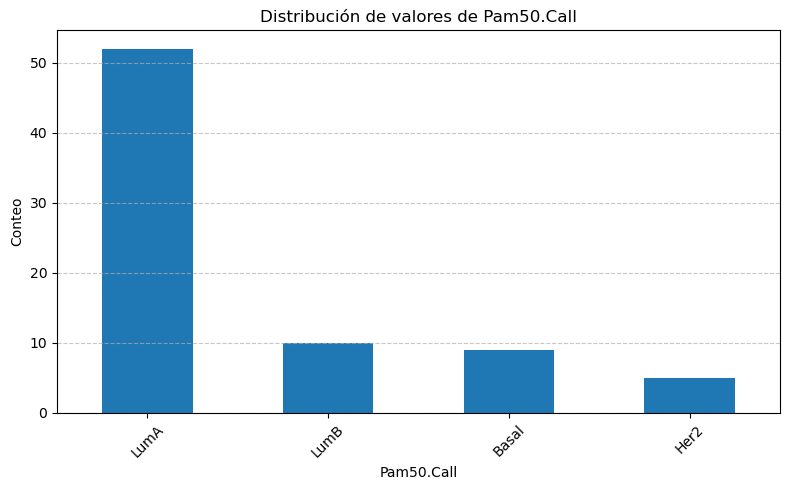

In [64]:
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar')
plt.title('Distribución de valores de Pam50.Call')
plt.xlabel('Pam50.Call')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save target class

In [66]:
target_class.to_csv(data_path + "target_class.csv", index = False)